<a href="https://colab.research.google.com/github/EfrainHernandezCortes/EDP2/blob/main/M%C3%A9todo_de_colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

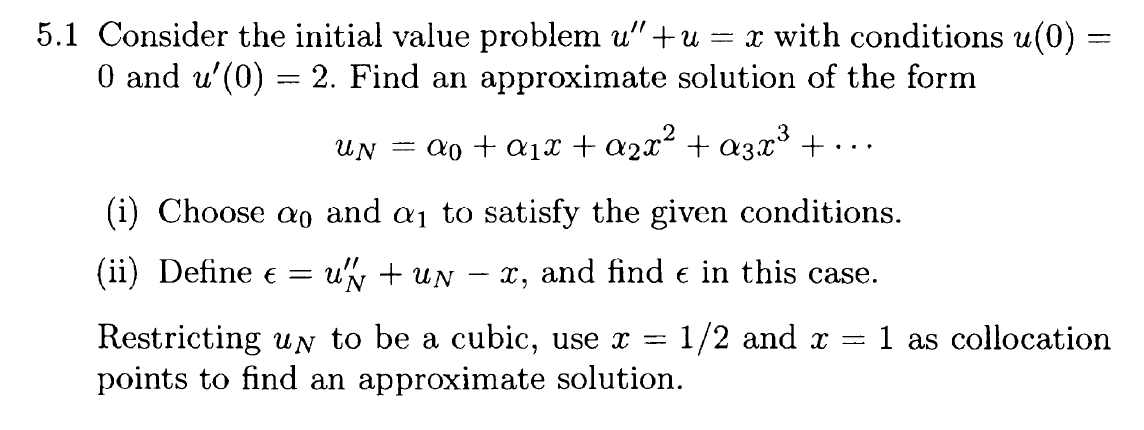

Solución analítica.

In [10]:
x, a, b = sp.symbols('x a b')
u = sp.Function('u')
x = sp.symbols('x') #Introducimos variable
u = sp.Function('u') #Introducimos función

Para resolver la ecuación

In [17]:
ode = u(x).diff(x, x) + u(x) - x
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

Condiciones.

In [18]:
sol=sp.dsolve(ode,ics={u(0):0, u(x).diff(x).subs(x,0):2})

In [19]:
sol

Eq(u(x), x + sin(x))

In [20]:
u_expr = sol.rhs #parte derecha de sol

u_num = sp.lambdify(x, u_expr, "numpy") #Se redefine como arreglo

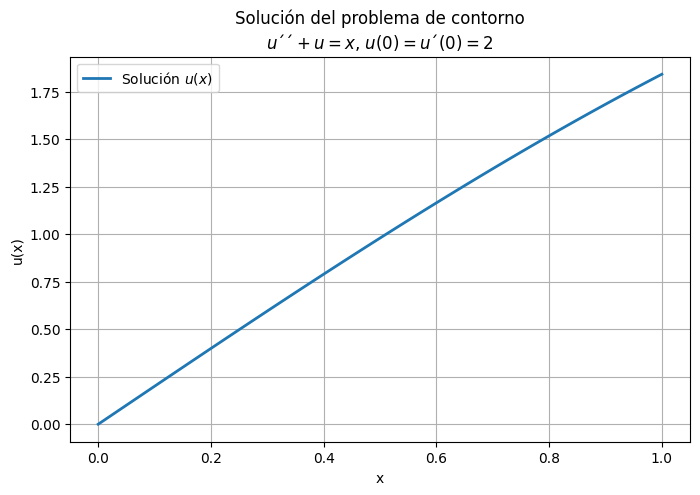

In [27]:
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title('Solución del problema de contorno\n$u´´ + u = x$, $u(0)=u´(0)=2$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

Solución numérica.


In [28]:
#Coeficientes inciales dados por las condiciones iniciales
alpha_0 = 0
alpha_1 = 2

Proponemos la función de prueba.

In [29]:
u_n = alpha_0 + alpha_1 * x + a * x**2 + b * x**3

In [30]:
u_n

a*x**2 + b*x**3 + 2*x

Y definimos el residuo (o error), E

In [31]:
u_n_2 = sp.diff(u_n, x, 2) #Segunda derivada

#E(x)
E = u_n_2 + u_n - x

In [32]:
E

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [33]:
E.simplify()

a*x**2 + 2*a + b*x**3 + 6*b*x + x

In [34]:
points=[sp.Rational(1,2),sp.Rational(1)]
print('Puntos de colocación:' ,points)

Puntos de colocación: [1/2, 1]


In [36]:
eqs=[sp.Eq(E.subs(x,p),0) for p in points]
#Resolver para a y b
sol_1=sp.solve(eqs,[a,b])

In [37]:
a_val = sol_1[a]
b_val = sol_1[b]

In [38]:
print(f" a2={a_val}, a3={b_val}")

 a2=-1/17, a3=-2/17


Sistema de ecuacioens simbólico

In [41]:
for eq in eqs:
 sp.pprint(eq)

9⋅a   25⋅b   1    
─── + ──── + ─ = 0
 4     8     2    
3⋅a + 7⋅b + 1 = 0


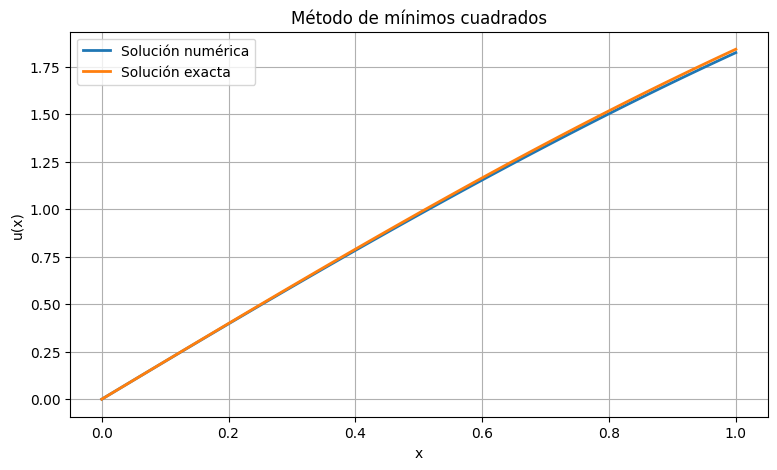

In [54]:
#Solución analítica y numérica
xx = np.linspace(0, 1, 100)

u_aprox_expr = u_n.subs({a: a_val, b: b_val}) # Solución aproximada
u_aprox_num = sp.lambdify(x, u_aprox_expr, 'numpy') # Convertir a función numérica

plt.figure(figsize=(9, 5))
plt.plot(xx, u_aprox_num(xx), label="Solución numérica", linewidth=2)
plt.plot(xx, yy, label="Solución exacta", linewidth=2)

plt.title("Método de mínimos cuadrados")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

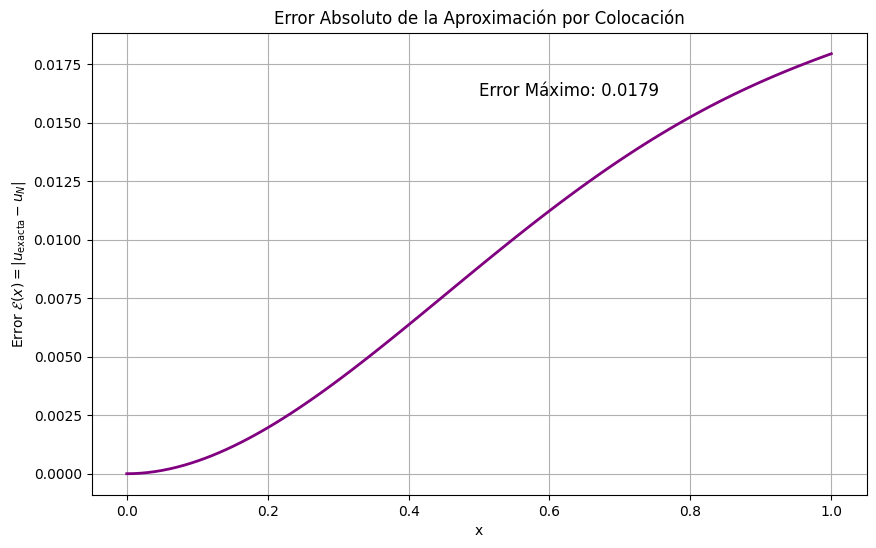

In [48]:
u_aprox_expr = u_n.subs({a: a_val, b: b_val})

error_expr = sp.Abs(u_exacta_expr - u_aprox_expr) #Error

error_num = sp.lambdify(x, error_expr, 'numpy') #Convertir el error a función numérica

xx = np.linspace(0, 1, 100)
yy_error = error_num(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy_error, color='purple', linewidth=2)
plt.title('Error Absoluto de la Aproximación por Colocación')
plt.xlabel('x')
plt.ylabel('Error $\\mathcal{E}(x) = |u_{\\text{exacta}} - u_N|$')
plt.grid(True)
#Error máximo
error_max = np.max(yy_error)
plt.annotate(f'Error Máximo: {error_max:.4f}',
             xy=(0.5, error_max * 0.9),
             xytext=(0.5, error_max * 0.9),
             fontsize=12)
plt.show()